In [1]:
#pip install pandas-profiling[notebook]
#pd.__version__

In [2]:
# Digit online data set

In [3]:
conda install -c conda -forge/label/cf202003 pandas-profiling


Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py install [-h] [--revision REVISION]
                               [-n ENVIRONMENT | -p PATH] [-c CHANNEL]
                               [--use-local] [--override-channels]
                               [--repodata-fn REPODATA_FNS]
                               [--strict-channel-priority]
                               [--no-channel-priority]
                               [--no-deps | --only-deps] [--no-pin] [--copy]
                               [--no-shortcuts] [-C] [-k] [--offline] [-d]
                               [--json] [-q] [-v] [-y] [--download-only]
                               [--show-channel-urls] [--file FILE]
                               [--force-reinstall]
                               [--freeze-installed | --update-deps | -S | --update-all | --update-specs]
                               [-m] [--clobber] [--dev]
                               [package_spec [package_spec ...]]
conda-script.py install: error: argument -f/--force: ignored 

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
#import pandas_profiling
#from pandas_profiling import ProfileReport
import pandas_profiling as pp

In [5]:
df=pd.read_csv('HR_comma_sep.csv')
#pd.set_option('display.max_rows', df.shape[0] + 1)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
#pp.ProfileReport(df)

In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [9]:
df.shape

(14999, 10)

In [10]:
df.groupby('left').mean().T

left,0,1
satisfaction_level,0.666810,0.440098
last_evaluation,0.715473,0.718113
number_project,3.786664,3.855503
average_montly_hours,199.060203,207.419210
time_spend_company,3.380032,3.876505
Work_accident,0.175009,0.047326
promotion_last_5years,0.026251,0.005321


In [11]:
df[['salary', 'left']].T

,0,1,2,3,4,5,6,7,8,9,...,14989,14990,14991,14992,14993,14994,14995,14996,14997,14998
salary,low,medium,medium,low,low,low,low,low,low,low,...,low,low,low,low,low,low,low,low,low,low
left,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:xlabel='left', ylabel='satisfaction_level'>

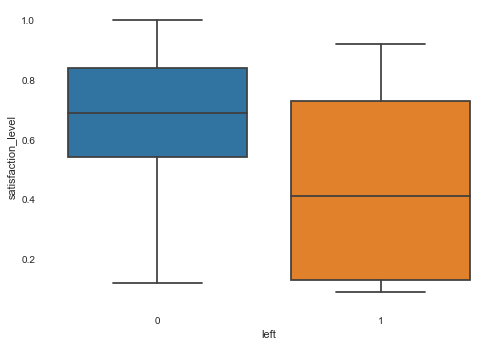

In [12]:
sns.boxplot(x = 'left', y = 'satisfaction_level', data = df)

In [13]:
#sns.countplot(x = 'promotion_last_5years', ylabel = 'count')

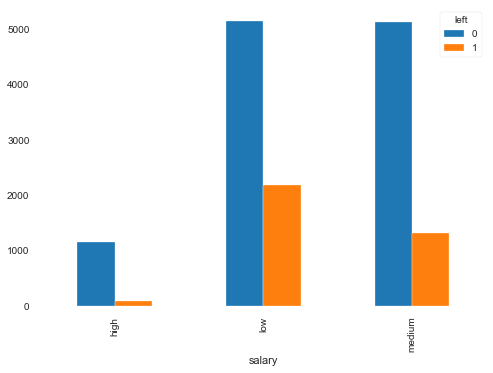

In [14]:
x = df['salary']
y = df['left']

pd.crosstab(x,y).plot(kind = 'bar')

plt.show()

In [15]:
#profilereport()

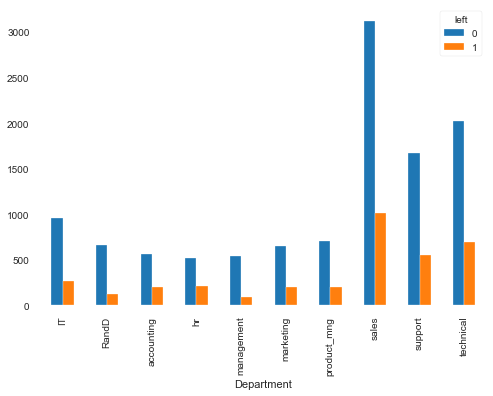

In [16]:
p = df['Department']
y = df['left']

pd.crosstab(p,y).plot(kind = 'bar')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['last_evaluation', 'number_project', 'time_spend_company', 'Department', 'salary', 'left'], axis = 'columns')
X

In [ ]:
y = df['left']
y

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)#, random_state = 42, train_size=0.8)
X_train

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_predicted = model.predict(X_test)
y_predicted

In [ ]:
train = model.predict(X_train)
train

In [ ]:
y_test

In [ ]:
model.predict_proba(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test,y_predicted)

In [ ]:
metrics.f1_score(y_test,y_predicted)

In [ ]:
model.score(X_test, y_test)

In [ ]:
arr = np.array([[0.94, 100, 0, 2], [0.14, 800, 1, 0], [0.67, 500, 0, 1], [0, 800, 1, 0]])
model.predict(arr)

In [ ]:
list(range(1, 5))